#### Author: Kolton Cox 
#### Date: February 5, 2021
#### Class: DATA 4319 Machine Learning
#### Professor: Dr. Randy Davila

<center> <h1>Perceptron Learning Algorithm</h1> </center>

-----------

#### Import libraries:

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron

--------------

### Peceptron Learning Algorithm #1

In [16]:
class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):            
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

Perceptron classification accuracy 1.0


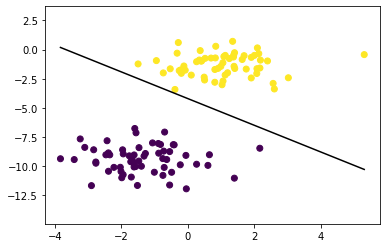

In [18]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_blobs(n_samples=150,n_features=2,centers=2,cluster_std=1.05,random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()

--------
### Perceptron Learning Algorith #2
--------

[0 0]: -0.12832482129747896 -> 0
[0 1]: 0.7177511653058068 -> 1
[1 0]: 0.1647109600700522 -> 1
[1 1]: 1.010786946673338 -> 1


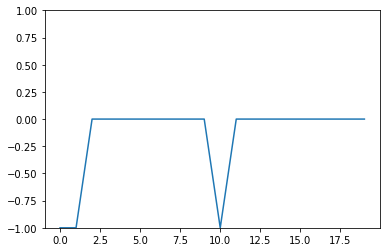

In [21]:
from numpy import array, random, dot
from random import choice
from pylab import ylim, plot
from matplotlib import pyplot as plt

step_function = lambda x: 0 if x < 0 else 1
training_dataset = [
    (array([0,0,1]), 0),
    (array([0,1,1]), 1),
    (array([1,0,1]), 1),
    (array([1,1,1]), 1),
]

weights = random.rand(3)
error = []
learning_rate = 0.2
n = 20

for j in range(n):
    x, expected = choice(training_dataset)
    result = dot(weights, x)
    err = expected - step_function(result)
    error.append(err)
    weights += learning_rate * err * x

for x, _ in training_dataset:
    result = dot(x, weights)
    print("{}: {} -> {}".format(x[:2], result, step_function(result)))
ylim([-1,1])
plot(error)
plt.show()

- From the above chart, you can tell that the errors began to stabilize at around the $ 10^{th} $ iteration during the training of our python perceptron algorithm example.

### Perceptron Algorithm Conclusions:

- The perceptron algorithm is the simplest form of artificial neural networks.
- It can be used to create a single Neuron model to solve binary classification problems.
- The concept of the perceptron is borrowed from the way the Neuron, which is the basic processing unit of the brain, works.
- The perceptron takes in a vector x as the input, multiplies it by the corresponding weight vector, $w$, then adds it to the bias, $b$.
- The output is then passed through an activation function to map the input between the required values.
- It is easy to implement the perceptron learning algorithm in python.